# 데이터 가져오기 및 확인

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

org_datas = load_diabetes()

# 모델에 입력할 데이터 준비하기

In [2]:
df_X = org_datas.data
df_y = org_datas.target

In [3]:
# pandas dataframe 으로 변경한 diabetes data 확인
print(df_X.shape)

(442, 10)


In [4]:
# pandas dataframe 으로 변경한 diabetes target 확인
print(df_y.shape)
print(df_y)

(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.

# 데이터셋 분리

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2004)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# 모델 준비 및 입력데이터 준비

In [6]:
# y=w1x1+w2x2+w3x3+w4x4+w5x5+w6x6+w7x7+w8x8+w9x9+w10x10+b

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 손실함수 (MSE)

In [7]:
def mse(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L

# gradient 함수

In [8]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# 학습률 설정

In [9]:
LEARNING_RATE = 0.1

# 모델 학습하기

In [10]:
losses = []

for epoch in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)

    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if epoch % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (epoch, L))

Iteration 100 : Loss 5309.6979
Iteration 200 : Loss 4830.5398
Iteration 300 : Loss 4473.0206
Iteration 400 : Loss 4203.2449
Iteration 500 : Loss 3997.0799
Iteration 600 : Loss 3837.3123
Iteration 700 : Loss 3711.6355
Iteration 800 : Loss 3611.2254
Iteration 900 : Loss 3529.7329
Iteration 1000 : Loss 3462.5688
Iteration 1100 : Loss 3406.3987
Iteration 1200 : Loss 3358.7835
Iteration 1300 : Loss 3317.9257
Iteration 1400 : Loss 3282.4881
Iteration 1500 : Loss 3251.4655
Iteration 1600 : Loss 3224.0932
Iteration 1700 : Loss 3199.7817
Iteration 1800 : Loss 3178.0701
Iteration 1900 : Loss 3158.5926
Iteration 2000 : Loss 3141.0544
Iteration 2100 : Loss 3125.2144
Iteration 2200 : Loss 3110.8725
Iteration 2300 : Loss 3097.8604
Iteration 2400 : Loss 3086.0348
Iteration 2500 : Loss 3075.2723
Iteration 2600 : Loss 3065.4657
Iteration 2700 : Loss 3056.5209
Iteration 2800 : Loss 3048.3552
Iteration 2900 : Loss 3040.8948
Iteration 3000 : Loss 3034.0741


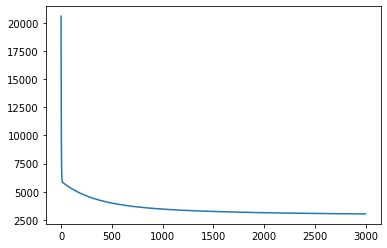

In [11]:
import matplotlib.pyplot as plt
# loss 시각화
plt.plot(losses)
plt.show()

# test 데이터에 대한 성능 확인하기

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2869.2728175660927

# 정답 데이터와 예측한 데이터 시각화하기

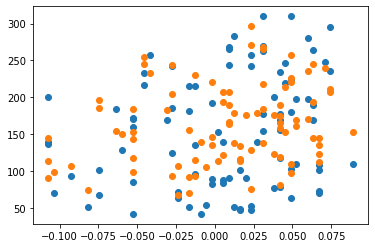

In [13]:
# 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 삽질

## 상황
처음 데이터 불러오는 부분에서 load_diabetes(as_frame=True) as_frame=True 옵션으로 pandas의 데이터프레임으로 받아왔다가 데이터 확인 후 numpy의 array으로 변경했다가 문제 발생

## 문제원인
**벡터화(1차원)**를 시켜야했는데 

as_frame=True 옵션으로 데이터프레임으로 받은 후 numpy의 array로 변경하면 예측해야할 값인 y배열에 데이터프레임의 열값인(target)이 하나의 차원(442(데이터갯수),1(컬럼이름=target)) 으로 인식되어 **2차원 배열**이 만들어져서 학습과정 연산 도중에 서로 **연산할 수 없는 shape입니다** 에러를 만났다.


```sh
# 에러내용
...
ValueError: operands could not be broadcast together with shapes (10,) (10,442) (10,)
...
```

## 해결
- load_diabetes의 as_frame 옵션은 default값이 False이므로 as_frame 옵션을 사용하지않고
- 기본적으로 load_diabetes의 data,target의 타입은 ndarray 이므로 위 상황처럼 dataframe으로 만들었다가 다시 ndarray로 변환하지 않고 바로 가져다 썼다.